In [ ]:
#%pip install pysus

In [1]:
import pandas as pd
import numpy as np
from pysus.ftp.databases.cnes import CNES
pd.set_option('display.max_columns', None)

In [2]:
# Function to convert the columns values to their lowest possible int type to  help with memory shortage
def convert_column(col):
    max_value = col.max()  
    
    if max_value <= 127:
        return col.astype('int8')  
    
    elif max_value <= 32767:
        return col.astype('int16')  
    
    elif max_value <= 2147483647:
        return col.astype('int32')  
    else:
        return col

# CNES

Types of healthcare data.

        LT – Hospital beds
        ST – Establishments
        DC - Complemental Data
        EQ – Equipments
        SR - Especialized service
        HB – Qualifications
        PF – Professional
        EP – Teams
        EE - Educational establishments
        EF - Philantropic establishments

The CNES concentrates the healthcare data and is monthy updated.

## Download

We load the files of each type (this can be done for all the types at the same time, but we did it one at a time due to memory restrain), select the states and the years that we want to get the files.  
Since the files come as parquets, we converted them to dataframes to manipulate the data, excluding the variables that represented specificy values (e.g., cpf_cnpj), or with a lot of data missing (observed in the pilot study).  
Common variables between the different datasets:  
    CNES - number of the health stablishment  
    CODUFMUN - the city code according to DATASUS  
    VINC_SUS - if the stablishment is part of the public service  
    TP_UNID - the type of stablishment (hospital, clinic, educational...)  
    COMPETEN - the date of the information, in the format yyyymm

In [3]:
cnes = CNES()
# groups= ['LT', 'ST', 'DC', 'EQ', 'SR', 'HB', 'PF', 'EP', 'EE', 'EF']
# month = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [4]:
states = [
    'AC',  # Acre
    'AP',  # Amapá
    'AM',  # Amazonas
    'PA',  # Pará
    'RO',  # Rondônia
    'RR',  # Roraima
    'TO'   # Tocantins
]

years = [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

### ST – Establishments

In [5]:
cnes.load('ST')
print(str(len(cnes.content)) + " files loaded")

6323 files loaded


In [6]:
files = cnes.get_files('ST', uf= states, year = years)
parquets = cnes.download(files)

/home/caibe/anaconda3/lib/python3.11/site-packages/tqdm/std.py:636: TqdmWarning: clamping frac to range [0, 1]
  full_bar = Bar(frac,
STTO2312.parquet: 100%|████████████████████| 6.71k/6.71k [00:00<00:00, 14.9kB/s]


In [7]:
df = pd.DataFrame()
for file in parquets:
    try:
        df1 = file.to_dataframe().drop(labels= ['COD_CEP', 'CPF_CNPJ', 'PF_PJ', 'NIV_DEP', 'CNPJ_MAN', 'COD_IR', 'REGSAUDE', 
                                                          'MICR_REG', 'DISTRSAN', 'DISTRADM', 'TPGESTAO', 'ESFERA_A', 'RETENCAO', 'ATIVIDAD', 
                                                          'NATUREZA', 'CLIENTEL', 'TURNO_AT', 'NIV_HIER', 'TP_PREST', 'CO_BANCO', 'CO_AGENC', 
                                                          'C_CORREN', 'CONTRATM', 'DT_PUBLM', 'CONTRATE', 'DT_PUBLE', 'ALVARA', 'DT_EXPED',
                                                          'ORGEXPED', 'AV_ACRED', 'CLASAVAL', 'DT_ACRED', 'AV_PNASS', 'DT_PNASS', 'GESPRG1E',
                                                          'GESPRG1M', 'GESPRG2E', 'GESPRG2M', 'GESPRG4E', 'GESPRG4M', 'NIVATE_A', 'GESPRG3E',
                                                          'GESPRG3M', 'GESPRG5E', 'GESPRG5M', 'GESPRG6E', 'GESPRG6M', 'NIVATE_H', 'QTINST01', 
                                                          'QTINST02', 'QTINST03', 'QTINST04', 'QTINST05', 'QTINST06', 'QTINST07', 'QTINST08', 
                                                          'QTINST09', 'QTINST10', 'QTINST11', 'QTINST12', 'QTINST13', 'QTINST14', 'URGEMERG', 
                                                          'QTINST15', 'QTINST16', 'QTINST17', 'QTINST18', 'QTINST19', 'QTINST20', 'QTINST21', 
                                                          'QTINST22', 'QTINST23', 'QTINST24', 'QTINST25', 'QTINST26', 'QTINST27', 'QTINST28', 
                                                          'QTINST29', 'QTINST30', 'ATENDAMB', 'QTINST31', 'QTINST32', 'QTINST33', 'CENTRCIR', 
                                                          'QTINST34', 'QTINST35', 'QTINST36', 'QTINST37', 'CENTROBS', 'CENTRNEO', 'ATENDHOS', 
                                                          'SERAP01P', 'SERAP01T', 'SERAP02P', 'SERAP02T', 'SERAP03P', 'SERAP03T', 'SERAP04P', 
                                                          'SERAP04T', 'SERAP05P', 'SERAP05T', 'SERAP06P', 'SERAP06T', 'SERAP07P', 'SERAP07T', 
                                                          'SERAP08P', 'SERAP08T', 'SERAP09P', 'SERAP09T', 'SERAP10P', 'SERAP10T', 'SERAP11P', 
                                                          'SERAP11T', 'SERAPOIO', 'RES_BIOL', 'RES_QUIM', 'RES_RADI', 'RES_COMU', 'COLETRES', 
                                                          'COMISS01', 'COMISS02', 'COMISS03', 'COMISS04', 'COMISS05', 'COMISS06', 'COMISS07', 
                                                          'COMISS08', 'COMISS09', 'COMISS10', 'COMISS11', 'COMISS12', 'COMISSAO', 'AP01CV01',
                                                          'AP01CV02', 'AP01CV05', 'AP01CV06', 'AP01CV03', 'AP01CV04', 'AP02CV01', 'AP02CV02', 
                                                          'AP02CV05', 'AP02CV06', 'AP02CV03', 'AP02CV04', 'AP03CV01', 'AP03CV02', 'AP03CV05', 
                                                          'AP03CV06', 'AP03CV03', 'AP03CV04', 'AP04CV01', 'AP04CV02', 'AP04CV05', 'AP04CV06', 
                                                          'AP04CV03', 'AP04CV04', 'AP05CV01', 'AP05CV02', 'AP05CV05', 'AP05CV06', 'AP05CV03', 
                                                          'AP05CV04', 'AP06CV01', 'AP06CV02', 'AP06CV05', 'AP06CV06', 'AP06CV03', 'AP06CV04',
                                                          'AP07CV01', 'AP07CV02', 'AP07CV05', 'AP07CV06', 'AP07CV03', 'AP07CV04', 'ATEND_PR', 
                                                          'DT_ATUAL', 
                                           ],
                                                 axis= 1)
        df = pd.concat([df, df1], ignore_index=True)
    except Exception as e:
        continue

In [10]:
print(df.columns.to_list())

['CNES', 'CODUFMUN', 'VINC_SUS', 'TP_UNID', 'QTLEITP1', 'QTLEITP2', 'QTLEITP3', 'LEITHOSP', 'QTLEIT05', 'QTLEIT06', 'QTLEIT07', 'QTLEIT08', 'QTLEIT09', 'QTLEIT19', 'QTLEIT20', 'QTLEIT21', 'QTLEIT22', 'QTLEIT23', 'QTLEIT32', 'QTLEIT34', 'QTLEIT38', 'QTLEIT39', 'QTLEIT40', 'COMPETEN']


In [9]:
# these variables were not present in some files, so we opted to excluded them here
df = df.drop(labels=['NAT_JUR', 'AP01CV07', 'AP02CV07', 'AP03CV07', 'AP04CV07', 'AP05CV07',
                                            'AP06CV07', 'AP07CV07', 'NAT_JUR'
                                           ],
                                                 axis= 1)

In [11]:
# column = df.columns
df = df.apply(pd.to_numeric, errors= 'coerce').apply(convert_column)
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252551 entries, 0 to 252550
Data columns (total 24 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   CNES      252551 non-null  int32
 1   CODUFMUN  252551 non-null  int32
 2   VINC_SUS  252551 non-null  int8 
 3   TP_UNID   252551 non-null  int8 
 4   QTLEITP1  252551 non-null  int16
 5   QTLEITP2  252551 non-null  int16
 6   QTLEITP3  252551 non-null  int16
 7   LEITHOSP  252551 non-null  int8 
 8   QTLEIT05  252551 non-null  int8 
 9   QTLEIT06  252551 non-null  int8 
 10  QTLEIT07  252551 non-null  int8 
 11  QTLEIT08  252551 non-null  int8 
 12  QTLEIT09  252551 non-null  int8 
 13  QTLEIT19  252551 non-null  int8 
 14  QTLEIT20  252551 non-null  int8 
 15  QTLEIT21  252551 non-null  int8 
 16  QTLEIT22  252551 non-null  int8 
 17  QTLEIT23  252551 non-null  int8 
 18  QTLEIT32  252551 non-null  int8 
 19  QTLEIT34  252551 non-null  int8 
 20  QTLEIT38  252551 non-null  int8 
 21  QTLEIT39  

For the hospital bed (leitos), we groupped the different types, into one column.

In [13]:
leitos = ['QTLEITP1', 'QTLEITP2', 'QTLEITP3', 'LEITHOSP', 'QTLEIT05', 'QTLEIT06', 'QTLEIT07', 'QTLEIT08', 'QTLEIT09',
          'QTLEIT19', 'QTLEIT20', 'QTLEIT21', 'QTLEIT22', 'QTLEIT23', 'QTLEIT32', 'QTLEIT34', 'QTLEIT38', 'QTLEIT39', 'QTLEIT40']

In [14]:
df['Leitos'] = df[leitos].agg('sum', axis=1)
df = df.drop(labels=leitos, axis=1)

In [17]:
df1

,CNES,CODUFMUN,VINC_SUS,TP_UNID,COMPETEN,Leitos
0,973,130260,0,4,202301,0
1,973,130260,0,4,202302,0
2,973,130260,0,4,202303,0
3,973,130260,0,4,202304,0
4,973,130260,0,4,202305,0
...,...,...,...,...,...,...
252546,9999914,110012,1,39,202308,0
252547,9999914,110012,1,39,202309,0
252548,9999914,110012,1,39,202310,0
252549,9999914,110012,1,39,202311,0


In [18]:
df1.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252551 entries, 0 to 252550
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   CNES      252551 non-null  int32
 1   CODUFMUN  252551 non-null  int32
 2   VINC_SUS  252551 non-null  int8 
 3   TP_UNID   252551 non-null  int8 
 4   COMPETEN  252551 non-null  int32
 5   Leitos    252551 non-null  int64
dtypes: int32(3), int64(1), int8(2)
memory usage: 5.3 MB


In [19]:
df1.to_csv('North_Health_stablishments.csv', index= False)

### DC - Complemental Data

In [20]:
cnes.load('DC')
print(str(len(cnes.content)) + " files loaded")

12641 files loaded


In [21]:
try:
    files = cnes.get_files('DC', uf= states, year = years)
    parquets = cnes.download(files)
except Exception as e:
    print('Some files not present')

/home/caibe/anaconda3/lib/python3.11/site-packages/tqdm/std.py:636: TqdmWarning: clamping frac to range [0, 1]
  full_bar = Bar(frac,
DCTO2312.parquet: 100%|██████████████████████| 80.8/80.8 [00:00<00:00, 1.41kB/s]


In [22]:
df = pd.DataFrame()
for file in parquets:
    try:
        df1 = file.to_dataframe().drop(labels= ['CPF_CNPJ', 'PF_PJ', 'NIV_DEP', 'CNPJ_MAN', 'COD_IR', 'REGSAUDE', 'MICR_REG', 'DISTRSAN',
                                                    'DISTRADM', 'TPGESTAO', 'ESFERA_A', 'RETENCAO', 'ATIVIDAD', 'NATUREZA', 'CLIENTEL', 
                                                    'TURNO_AT', 'NIV_HIER', 'TP_PREST', 'S_HBSAGP', 'S_HBSAGN', 'S_DPI', 'S_DPAC', 'S_REAGP',
                                                    'S_REAGN', 'S_REHCV', 'MAQ_PROP', 'MAQ_OUTR', 'F_AREIA', 'F_CARVAO', 'ABRANDAD', 'DEIONIZA',
                                                    'OSMOSE_R', 'OUT_TRAT', 'CNS_NEFR', 'DIALISE', 'SIMUL_RD', 'PLANJ_RD', 'ARMAZ_FT', 'CONF_MAS',
                                                    'SALA_MOL', 'BLOCOPER', 'S_ARMAZE', 'S_PREPAR', 'S_QCDURA', 'S_QLDURA', 'S_CPFLUX', 'S_SIMULA',
                                                    'S_ACELL6', 'S_ALSEME', 'S_ALCOME', 'ORTV1050', 'ORV50150', 'OV150500', 'UN_COBAL', 'EQBRBAIX',
                                                    'EQBRMEDI', 'EQBRALTA', 'EQ_MAREA', 'EQ_MINDI', 'EQSISPLN', 'EQDOSCLI', 'EQFONSEL', 'CNS_ADM', 
                                                    'CNS_OPED', 'CNS_CONC', 'CNS_OCLIN', 'CNS_MRAD', 'CNS_FNUC', 'QUIMRADI', 'S_RECEPC', 'S_TRIHMT',
                                                    'S_TRICLI', 'S_COLETA', 'S_AFERES', 'S_PREEST', 'S_PROCES', 'S_ESTOQU', 'S_DISTRI', 'S_SOROLO', 
                                                    'S_IMUNOH', 'S_PRETRA', 'S_HEMOST', 'S_CONTRQ', 'S_BIOMOL', 'S_IMUNFE', 'S_TRANSF', 'S_SGDOAD', 
                                                    'QT_CADRE', 'QT_CENRE', 'QT_REFSA', 'QT_CONRA', 'QT_EXTPL', 'QT_FRE18', 'QT_FRE30', 'QT_AGIPL', 
                                                    'QT_SELAD', 'QT_IRRHE', 'QT_AGLTN', 'QT_MAQAF', 'QT_REFRE', 'QT_REFAS', 'QT_CAPFL', 'CNS_HMTR', 
                                                    'CNS_HMTL', 'CNS_CRES', 'CNS_RTEC', 'HEMOTERA', 'AP01CV01', 'AP01CV02', 'AP01CV05', 'AP01CV06', 
                                                    'AP01CV03', 'AP01CV04', 'AP02CV01', 'AP02CV02', 'AP02CV05', 'AP02CV06', 'AP02CV03', 'AP02CV04', 
                                                    'AP03CV01', 'AP03CV02', 'AP03CV05', 'AP03CV06', 'AP03CV03', 'AP03CV04', 'AP04CV01', 'AP04CV02', 
                                                    'AP04CV05', 'AP04CV06', 'AP04CV03', 'AP04CV04', 'AP05CV01', 'AP05CV02', 'AP05CV05', 'AP05CV06', 
                                                    'AP05CV03', 'AP05CV04', 'AP06CV01', 'AP06CV02', 'AP06CV05', 'AP06CV06', 'AP06CV03', 'AP06CV04', 
                                                    'AP07CV01', 'AP07CV02', 'AP07CV05', 'AP07CV06', 'AP07CV03', 'AP07CV04', 'ATEND_PR', 'GESPRG3E', 
                                                    'GESPRG3M', 'GESPRG4E', 'GESPRG4M', 'GESPRG6E', 'GESPRG6M', 'NIVATE_A', 'NIVATE_H', 'NAT_JUR',
                                                    'AP01CV07', 'AP02CV07', 'AP03CV07', 'AP04CV07', 'AP05CV07', 'AP06CV07', 'AP07CV07'],
                                            axis= 1)
        columns = df1.columns
        df1[columns] = df1[columns].apply(pd.to_numeric, errors= 'coerce').astype('Int32')
        df = pd.concat([df, df1], ignore_index=True).sort_values(by= ['CNES', 'CODUFMUN', 'COMPETEN'])
    except Exception as e:
        continue

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2931 entries, 0 to 2910
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   CNES      2931 non-null   Int32
 1   CODUFMUN  2931 non-null   Int32
 2   VINC_SUS  2931 non-null   Int32
 3   TP_UNID   2931 non-null   Int32
 4   COMPETEN  2931 non-null   Int32
dtypes: Int32(5)
memory usage: 94.5 KB


In [26]:
df.to_csv('North_Complementary_data.csv', index= False)

### EQ - Equipments

In [27]:
cnes.load('EQ')
print(str(len(cnes.content)) + " files loaded")

18958 files loaded


In [28]:
files = cnes.get_files('EQ', uf= states, year = years)
parquets = cnes.download(files)

/home/caibe/anaconda3/lib/python3.11/site-packages/tqdm/std.py:636: TqdmWarning: clamping frac to range [0, 1]
  full_bar = Bar(frac,
EQTO2312.parquet: 100%|███████████████████▉| 4.03k/4.03k [00:00<00:00, 19.2kB/s]


In [29]:
df = pd.DataFrame()
for file in parquets:
    try:
        df1 = file.to_dataframe().drop(labels= ['REGSAUDE', 'MICR_REG', 'DISTRSAN', 'DISTRADM', 'TPGESTAO', 'PF_PJ', 'CPF_CNPJ', 'NIV_DEP', 'CNPJ_MAN', 'ESFERA_A',
                      'ATIVIDAD', 'RETENCAO', 'NATUREZA', 'CLIENTEL', 'TURNO_AT', 'NIV_HIER', 'TERCEIRO', 'CODEQUIP', 'QT_EXIST', 'QT_USO', 'NAT_JUR'],
                                            axis= 1)
        columns = df1.columns
        df1[columns] = df1[columns].apply(pd.to_numeric, errors= 'coerce').astype('Int32')
        df = pd.concat([df, df1], ignore_index=True).sort_values(by= ['CNES', 'CODUFMUN', 'COMPETEN'])
       
    except Exception as e:
        continue

In [30]:
print(df.columns.to_list())

['CNES', 'CODUFMUN', 'REGSAUDE', 'MICR_REG', 'DISTRSAN', 'DISTRADM', 'TPGESTAO', 'PF_PJ', 'CPF_CNPJ', 'NIV_DEP', 'CNPJ_MAN', 'ESFERA_A', 'ATIVIDAD', 'RETENCAO', 'NATUREZA', 'CLIENTEL', 'TP_UNID', 'TURNO_AT', 'NIV_HIER', 'TERCEIRO', 'TIPEQUIP', 'CODEQUIP', 'QT_EXIST', 'QT_USO', 'IND_SUS', 'IND_NSUS', 'COMPETEN', 'NAT_JUR']


In [32]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 752677 entries, 0 to 744860
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   CNES      752677 non-null  Int32
 1   CODUFMUN  752677 non-null  Int32
 2   TP_UNID   752677 non-null  Int32
 3   TIPEQUIP  752677 non-null  Int32
 4   IND_SUS   752677 non-null  Int32
 5   IND_NSUS  752677 non-null  Int32
 6   COMPETEN  752677 non-null  Int32
dtypes: Int32(7)
memory usage: 30.9 MB


In [33]:
df.to_csv('North_Equipments.csv', index= False)

### SR - Specialized services

In [34]:
cnes.load('SR')
print(str(len(cnes.content)) + " files loaded")

25274 files loaded


In [35]:
files = cnes.get_files('SR', uf= states, year = years)
parquets = cnes.download(files)

/home/caibe/anaconda3/lib/python3.11/site-packages/tqdm/std.py:636: TqdmWarning: clamping frac to range [0, 1]
  full_bar = Bar(frac,
SRTO2312.parquet: 100%|████████████████████| 4.77k/4.77k [00:00<00:00, 19.9kB/s]


In [36]:
df = pd.DataFrame()

for file in parquets:
    try:
        df1 = file.to_dataframe().drop(labels= ['CLASS_SR', 'SRVUNICO', 'REGSAUDE', 'MICR_REG', 'DISTRSAN', 'DISTRADM', 'TPGESTAO', 'PF_PJ', 'CPF_CNPJ', 'NIV_DEP', 'ESFERA_A', 
                      'ATIVIDAD', 'RETENCAO', 'NATUREZA', 'CLIENTEL', 'TURNO_AT', 'NIV_HIER', 'TERCEIRO', 'CNPJ_MAN', 'CARACTER', 'AMB_NSUS', 'HOSP_NSUS',
                      'CONTSRVU', 'CNESTERC', 'NAT_JUR'],
                                            axis= 1)
        columns = df1.columns
        df1[columns] = df1[columns].apply(pd.to_numeric, errors= 'coerce').astype('Int32')
        df = pd.concat([df, df1], ignore_index=True).sort_values(by= ['CNES', 'CODUFMUN', 'COMPETEN'])
      
    except Exception as e:
        continue

In [39]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 779055 entries, 0 to 770551
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   CNES      779055 non-null  Int32
 1   CODUFMUN  779055 non-null  Int32
 2   SERV_ESP  779055 non-null  Int32
 3   TP_UNID   779055 non-null  Int32
 4   AMB_SUS   779055 non-null  Int32
 5   HOSP_SUS  779055 non-null  Int32
 6   COMPETEN  779055 non-null  Int32
dtypes: Int32(7)
memory usage: 31.9 MB


In [40]:
df.to_csv('North_Specialized_services.csv', index= False)

### EP – Teams

In [41]:
cnes.load('EP')
print(str(len(cnes.content)) + " files loaded")

31052 files loaded


In [42]:
files = cnes.get_files('EP', uf= states, year = years)
parquets = cnes.download(files)

/home/caibe/anaconda3/lib/python3.11/site-packages/tqdm/std.py:636: TqdmWarning: clamping frac to range [0, 1]
  full_bar = Bar(frac,
EPTO2312.parquet: 100%|███████████████████▉| 2.73k/2.73k [00:00<00:00, 18.5kB/s]


In [43]:
df = pd.DataFrame()

for file in parquets:
    try:
        df1 = file.to_dataframe().drop(labels= ['COD_CEP', 'CPF_CNPJ', 'PF_PJ', 'NIV_DEP', 'CNPJ_MAN', 'COD_IR', 'REGSAUDE', 'MICR_REG', 'DISTRSAN', 'DISTRADM', 'TPGESTAO', 
                      'ESFERA_A', 'RETENCAO', 'ATIVIDAD', 'NATUREZA', 'CLIENTEL', 'TURNO_AT', 'NIV_HIER', 'TERCEIRO', 'TP_PREST', 'GESPRG1E', 'GESPRG1M',
                      'GESPRG2E', 'GESPRG2M', 'GESPRG4E', 'GESPRG4M', 'NIVATE_A', 'GESPRG3E', 'GESPRG3M', 'GESPRG5E', 'GESPRG5M', 'GESPRG6E', 'GESPRG6M',
                      'NIVATE_H', 'AP01CV01', 'AP01CV02', 'AP01CV05', 'AP01CV06', 'AP01CV03', 'AP01CV04', 'AP02CV01', 'AP02CV02', 'AP02CV05', 'AP02CV06',
                      'AP02CV03', 'AP02CV04', 'AP03CV01', 'AP03CV02', 'AP03CV05', 'AP03CV06', 'AP03CV03', 'AP03CV04', 'AP04CV01', 'AP04CV02', 'AP04CV05',
                      'AP04CV06', 'AP04CV03', 'AP04CV04', 'AP05CV01', 'AP05CV02', 'AP05CV05', 'AP05CV06', 'AP05CV03', 'AP05CV04', 'AP06CV01', 'AP06CV02',
                      'AP06CV05', 'AP06CV06', 'AP06CV03', 'AP06CV04', 'AP07CV01', 'AP07CV02', 'AP07CV05', 'AP07CV06', 'AP07CV03', 'AP07CV04', 'ATEND_PR',
                      'IDEQUIPE','NOME_EQP', 'ID_AREA', 'NOMEAREA', 'ID_SEGM', 'DESCSEGM', 'TIPOSEGM', 'MOTDESAT', 'TP_DESAT', 'NAT_JUR', 'AP01CV07', 
                      'AP02CV07', 'AP03CV07', 'AP04CV07', 'AP05CV07', 'AP06CV07', 'AP07CV07'],
                                            axis= 1)
        columns = df1.columns
        df1[columns] = df1[columns].apply(pd.to_numeric, errors= 'coerce').astype('Int32')
        df = pd.concat([df, df1], ignore_index=True).sort_values(by= ['CNES', 'CODUFMUN', 'COMPETEN'])
       
    except Exception as e:
        continue

In [46]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 114872 entries, 0 to 113537
Data columns (total 14 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   CNES      114872 non-null  Int32
 1   CODUFMUN  114872 non-null  Int32
 2   VINC_SUS  114872 non-null  Int32
 3   TP_UNID   114872 non-null  Int32
 4   TIPO_EQP  114872 non-null  Int32
 5   DT_ATIVA  114872 non-null  Int32
 6   DT_DESAT  114872 non-null  Int32
 7   QUILOMBO  114872 non-null  Int32
 8   ASSENTAD  114872 non-null  Int32
 9   POPGERAL  114872 non-null  Int32
 10  ESCOLA    114872 non-null  Int32
 11  INDIGENA  114872 non-null  Int32
 12  PRONASCI  114872 non-null  Int32
 13  COMPETEN  114872 non-null  Int32
dtypes: Int32(14)
memory usage: 8.5 MB


In [47]:
df.to_csv('North_Teams.csv', index= False)

### HB – Qualification

In [5]:
cnes.load('HB')
print(str(len(cnes.content)) + " files loaded")

5819 files loaded


In [6]:
files = cnes.get_files('HB', uf= states, year = years)
parquets = cnes.download(files)

HBTO2312.parquet: 100%|███████████████████████▉| 198/198 [00:00<00:00, 3.81kB/s]


In [7]:
df = pd.DataFrame()

for file in parquets:
    try:
        df1 = file.to_dataframe().drop(labels= ['REGSAUDE', 'MICR_REG', 'DISTRSAN', 'DISTRADM', 'TPGESTAO', 'PF_PJ', 'CPF_CNPJ', 'NIV_DEP', 'CNPJ_MAN', 'ESFERA_A', 'RETENCAO',
                      'ATIVIDAD', 'NATUREZA', 'CLIENTEL', 'TURNO_AT', 'NIV_HIER', 'TERCEIRO', 'COD_CEP', 'TP_PREST', 'CMPT_INI', 'CMPT_FIM', 'DTPORTAR',
                      'PORTARIA', 'MAPORTAR', 'NAT_JUR'],
                                            axis= 1)
        columns = df1.columns
        df1[columns] = df1[columns].apply(pd.to_numeric, errors= 'coerce').astype('Int32')
        df = pd.concat([df, df1], ignore_index=True).sort_values(by= ['CNES', 'CODUFMUN', 'COMPETEN'])
        
    except Exception as e:
        continue

In [10]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 21206 entries, 0 to 20998
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   CNES      21206 non-null  Int32
 1   CODUFMUN  21206 non-null  Int32
 2   TP_UNID   21206 non-null  Int32
 3   VINC_SUS  21206 non-null  Int32
 4   SGRUPHAB  21206 non-null  Int32
 5   NULEITOS  21206 non-null  Int32
 6   COMPETEN  21206 non-null  Int32
dtypes: Int32(7)
memory usage: 890.5 KB


In [11]:
df.to_csv('North_Habilitations.csv', index= False)

### EE - Educational establishments

In [5]:
cnes.load('EE')
print(str(len(cnes.content)) + " files loaded")

3214 files loaded


In [6]:
files = cnes.get_files('EE', uf= states, year = years)
parquets = cnes.download(files)

100%|██████████████████████████████████████| 1.14k/1.14k [00:00<00:00, 1.73MB/s]


In [7]:
df = pd.DataFrame()

for file in parquets:
    try:
        df1 = file.to_dataframe().drop(labels= ['REGSAUDE', 'MICR_REG', 'DISTRSAN', 'DISTRADM', 'TPGESTAO', 'PF_PJ', 'CPF_CNPJ', 'NIV_DEP', 'CNPJ_MAN', 'ESFERA_A', 'RETENCAO', 
                      'ATIVIDAD', 'NATUREZA', 'CLIENTEL',
                      'TURNO_AT', 'NIV_HIER', 'TERCEIRO', 'COD_CEP', 'TP_PREST', 'CMPT_INI', 'CMPT_FIM', 'DTPORTAR', 'PORTARIA', 'MAPORTAR', 'NAT_JUR'],
                                            axis= 1)
        columns = df1.columns
        df1[columns] = df1[columns].apply(pd.to_numeric, errors= 'coerce').astype('Int32')
        df = pd.concat([df, df1], ignore_index=True).sort_values(by= ['CNES', 'CODUFMUN', 'COMPETEN'])
        
    except Exception as e:
        continue

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 717 entries, 0 to 715
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   CNES      717 non-null    Int32
 1   CODUFMUN  717 non-null    Int32
 2   TP_UNID   717 non-null    Int32
 3   VINC_SUS  717 non-null    Int32
 4   SGRUPHAB  717 non-null    Int32
 5   COMPETEN  717 non-null    Int32
dtypes: Int32(6)
memory usage: 26.6 KB


In [ ]:
df.to_csv('North_Educational_stablishments.csv', index= False)

### EF - Philantropic establishments

In [17]:
cnes.load('EF')
print(str(len(cnes.content)) + " files loaded")

14395 files loaded


In [21]:
files = cnes.get_files('EF', uf= states, year = years)
parquets = cnes.download(files)

EFTO2312.parquet: 100%|███████████████████████▉| 6.04/6.04 [00:00<00:00, 197B/s]


In [22]:
df = pd.DataFrame()

for file in parquets:
    try:
        df1 = file.to_dataframe().drop(labels=['REGSAUDE', 'MICR_REG', 'DISTRSAN', 'DISTRADM', 'TPGESTAO', 'PF_PJ', 'CPF_CNPJ', 'NIV_DEP', 'CNPJ_MAN', 'ESFERA_A', 'RETENCAO', 
                     'ATIVIDAD', 'NATUREZA', 'CLIENTEL', 'TURNO_AT', 'NIV_HIER', 'TERCEIRO', 'COD_CEP', 'TP_PREST', 'CMPT_INI', 'CMPT_FIM', 'DTPORTAR',
                     'PORTARIA', 'MAPORTAR', 'NAT_JUR'],
                                            axis= 1)
        columns = df1.columns
        df1[columns] = df1[columns].apply(pd.to_numeric, errors= 'coerce').astype('Int32')
        df = pd.concat([df, df1], ignore_index=True).sort_values(by= ['CNES', 'CODUFMUN', 'COMPETEN'])
        
    except Exception as e:
        continue

In [25]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 204 entries, 0 to 202
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   CNES      204 non-null    Int32
 1   CODUFMUN  204 non-null    Int32
 2   TP_UNID   204 non-null    Int32
 3   VINC_SUS  204 non-null    Int32
 4   SGRUPHAB  204 non-null    Int32
 5   COMPETEN  204 non-null    Int32
dtypes: Int32(6)
memory usage: 7.6 KB


In [26]:
df.to_csv('North_Philantropic_stablishments.csv', index= False)

### PF – Professionals

In [27]:
cnes.load('PF')
print(str(len(cnes.content)) + " files loaded")

20713 files loaded


In [28]:
files = cnes.get_files('PF', uf= states, year = years)
parquets = cnes.download(files)

PFTO2312.parquet: 100%|████████████████████| 50.4k/50.4k [00:01<00:00, 39.8kB/s]


In [29]:
df = pd.DataFrame()

for file in parquets:
    try:
        df1 = file.to_dataframe().drop(labels= ['REGSAUDE', 'MICR_REG', 'DISTRSAN', 'DISTRADM', 'TPGESTAO', 'PF_PJ', 'CPF_CNPJ',
                      'NIV_DEP', 'CNPJ_MAN', 'ESFERA_A', 'ATIVIDAD', 'RETENCAO', 'NATUREZA', 'CLIENTEL', 'TURNO_AT', 
                      'NIV_HIER', 'TERCEIRO', 'CPF_PROF', 'CPFUNICO', 'CBO', 'CBOUNICO', 'NOMEPROF', 'CNS_PROF', 'REGISTRO',
                      'VINCULAC', 'VINCUL_C', 'VINCUL_A', 'VINCUL_N', 'PROFNSUS', 'HORAOUTR', 'HORAHOSP', 'HORA_AMB', 'UFMUNRES', 'NAT_JUR',
                                            axis= 1)
        columns = df1.columns
        df1[columns] = df1[columns].apply(pd.to_numeric, errors= 'coerce').astype('Int32')
        df = pd.concat([df, df1], ignore_index=True).sort_values(by= ['CNES', 'CODUFMUN', 'COMPETEN'])
        
    except Exception as e:
        continue

In [32]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 4488359 entries, 0 to 4444566
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype
---  ------    --------------    -----
 0   CNES      4488359 non-null  Int32
 1   CODUFMUN  4488359 non-null  Int32
 2   TP_UNID   4488359 non-null  Int32
 3   CONSELHO  2834391 non-null  Int32
 4   PROF_SUS  4488359 non-null  Int32
 5   COMPETEN  4488359 non-null  Int32
dtypes: Int32(6)
memory usage: 162.7 MB


In [33]:
df.to_csv('North_Professionals.csv', index= False)

## Processing

For the ducational, phylantropic, and qualifications datasets we separated the different qualifications. The codes for different qualifications can be acccessed in the link http://tabnet.datasus.gov.br/cgi/cnes/Habilita%C3%A7%C3%B5es.htm#Tipo1  
We grouped similar qualifications into some categories.

### EE - Educational establishments

In [75]:
ee = pd.read_csv('North_Educational_stablishments.csv')
ee

,CNES,CODUFMUN,TP_UNID,VINC_SUS,SGRUPHAB,COMPETEN
0,2012685,130260,5,1,5001,200901
1,2012685,130260,5,1,5001,200902
2,2012685,130260,5,1,5001,200903
3,2012685,130260,5,1,5001,200904
4,2012685,130260,5,1,5001,200905
...,...,...,...,...,...,...
989,5585422,150680,7,1,5001,201809
990,5585422,150680,7,1,5001,201810
991,5585422,150680,7,1,5001,201811
992,5585422,150680,7,1,5001,201812


In [76]:
ee.SGRUPHAB = 'TEACHING'
ee = pd.get_dummies(ee, columns=['SGRUPHAB']).apply(convert_column)

In [78]:
ee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994 entries, 0 to 993
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   CNES               994 non-null    int32
 1   CODUFMUN           994 non-null    int32
 2   TP_UNID            994 non-null    int8 
 3   VINC_SUS           994 non-null    int8 
 4   COMPETEN           994 non-null    int32
 5   SGRUPHAB_TEACHING  994 non-null    int8 
dtypes: int32(3), int8(3)
memory usage: 14.7 KB


In [79]:
ee.to_csv('North_EducationalStablishments_ready.csv', index= False)

### EE - Phylantropic establishments

In [10]:
ef = pd.read_csv('North_Philantropic_stablishments.csv')
ef

,CNES,CODUFMUN,TP_UNID,VINC_SUS,SGRUPHAB,COMPETEN
0,2002078,120040,5,1,6001,202301
1,2002078,120040,5,1,6001,202302
2,2002078,120040,5,1,6001,202303
3,2002078,120040,5,1,6001,202304
4,2002078,120040,5,1,6001,202305
...,...,...,...,...,...,...
199,4006429,150830,5,1,6001,202308
200,4006429,150830,5,1,6001,202309
201,4006429,150830,5,1,6001,202310
202,4006429,150830,5,1,6001,202311


In [11]:
ef.SGRUPHAB = 'PHYLANTHROPY'
ef = pd.get_dummies(ef, columns=['SGRUPHAB']).apply(convert_column)

In [13]:
ef.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   CNES                   204 non-null    int32
 1   CODUFMUN               204 non-null    int32
 2   TP_UNID                204 non-null    int8 
 3   VINC_SUS               204 non-null    int8 
 4   COMPETEN               204 non-null    int32
 5   SGRUPHAB_PHYLANTHROPY  204 non-null    int8 
dtypes: int32(3), int8(3)
memory usage: 3.1 KB


In [14]:
ef.to_csv('North_PhilantropicStablishments_ready.csv', index= False)

### HB - Qualifications

In [49]:
hb = pd.read_csv('North_Habilitations.csv')
hb

,CNES,CODUFMUN,TP_UNID,VINC_SUS,SGRUPHAB,NULEITOS,COMPETEN
0,7641,150240,5,1,1101,0,202301
1,7641,150240,5,1,2601,16,202301
2,7641,150240,5,1,2696,4,202301
3,7641,150240,5,1,1101,0,202302
4,7641,150240,5,1,2601,16,202302
...,...,...,...,...,...,...,...
21201,9958347,150170,36,1,403,0,202308
21202,9958347,150170,36,1,403,0,202309
21203,9958347,150170,36,1,403,0,202310
21204,9958347,150170,36,1,403,0,202311


In [50]:
sgruphab_dict = {
    201: 'SURGERY',
    202: 'OBESITY',
    203: 'OBESITY',
    401: 'ODONTOLOGY',
    403: 'ODONTOLOGY',
    404: 'ODONTOLOGY',
    405: 'ODONTOLOGY',
    406: 'ODONTOLOGY',
    301: 'OPHTHALMOLOGY',
    503: 'OPHTHALMOLOGY',
    504: 'OPHTHALMOLOGY',
    506: 'OPHTHALMOLOGY',
    508: 'OPHTHALMOLOGY',
    601: 'MENTAL_HEALTH',
    602: 'MENTAL_HEALTH',
    604: 'MENTAL_HEALTH',
    606: 'MENTAL_HEALTH',
    611: 'MENTAL_HEALTH',
    615: 'MENTAL_HEALTH',
    616: 'MENTAL_HEALTH',
    617: 'MENTAL_HEALTH',
    618: 'MENTAL_HEALTH',
    619: 'MENTAL_HEALTH',
    620: 'MENTAL_HEALTH',
    621: 'MENTAL_HEALTH',
    631: 'MENTAL_HEALTH',
    632: 'MENTAL_HEALTH',
    633: 'MENTAL_HEALTH',
    634: 'MENTAL_HEALTH',
    635: 'MENTAL_HEALTH',
    636: 'MENTAL_HEALTH',
    637: 'MENTAL_HEALTH',
    801: 'CARDIOVASCULAR',
    802: 'CARDIOVASCULAR',
    803: 'CARDIOVASCULAR',
    804: 'CARDIOVASCULAR',
    805: 'CARDIOVASCULAR',
    806: 'CARDIOVASCULAR',
    807: 'CARDIOVASCULAR',
    815: 'CARDIOVASCULAR',
    901: 'CHRONIC_DISEASES',
    902: 'CHRONIC_DISEASES',
    903: 'CHRONIC_DISEASES',
    904: 'CHRONIC_DISEASES',
    1201: 'CHRONIC_DISEASES',
    906: 'HIV/AIDS',
    1101: 'HIV/AIDS',
    1102: 'HIV/AIDS',
    1103: 'HIV/AIDS',
    1104: 'HIV/AIDS',
    1105: 'HIV/AIDS',
    1106: 'HIV/AIDS',
    1203: 'HIV/AIDS',
    1204: 'HIV/AIDS',
    905: 'ONCOLOGY',
    1704: 'ONCOLOGY',
    1706: 'ONCOLOGY',
    1707: 'ONCOLOGY',
    1708: 'ONCOLOGY',
    1709: 'ONCOLOGY',
    1710: 'ONCOLOGY',
    1711: 'ONCOLOGY',
    1712: 'ONCOLOGY',
    1713: 'ONCOLOGY',
    1714: 'ONCOLOGY',
    1715: 'ONCOLOGY',
    1716: 'ONCOLOGY',
    1717: 'ONCOLOGY',
    1718: 'ONCOLOGY',
    1719: 'ONCOLOGY',
    1720: 'ONCOLOGY',
    1722: 'ONCOLOGY',
    1723: 'ONCOLOGY',
    1801: 'ONCOLOGY',
    3201: 'ONCOLOGY',
    3202: 'ONCOLOGY',
    3203: 'ONCOLOGY',
    101: 'GERIATRIC',
    1205: 'GERIATRIC',
    1401: 'PREGNANCY',
    1402: 'PREGNANCY',
    1403: 'PREGNANCY',
    1404: 'PREGNANCY',
    1406: 'PREGNANCY',
    1407: 'PREGNANCY',
    1408: 'PREGNANCY',
    1410: 'PREGNANCY',
    1411: 'PREGNANCY',
    1412: 'PREGNANCY',
    1413: 'PREGNANCY',
    1414: 'PREGNANCY',
    1415: 'PREGNANCY',
    1416: 'PREGNANCY',
    1417: 'PREGNANCY',
    1418: 'PREGNANCY',
    1419: 'PREGNANCY',
    1504: 'NEPHROLOGY',
    1505: 'NEPHROLOGY',
    1506: 'NEPHROLOGY',
    1601: 'NEUROLOGY',
    1602: 'NEUROLOGY',
    1615: 'NEUROLOGY',
    1616: 'NEUROLOGY',
    1617: 'NEUROLOGY',
    1618: 'NEUROLOGY',
    1901: 'SURGERY',
    1902: 'SURGERY',
    2001: 'PHYSICAL_REHABILITATION',
    2101: 'PHYSICAL_REHABILITATION',
    2102: 'PHYSICAL_REHABILITATION',
    2201: 'PHYSICAL_REHABILITATION',
    2202: 'PHYSICAL_REHABILITATION',
    2203: 'PHYSICAL_REHABILITATION',
    2204: 'PHYSICAL_REHABILITATION',
    2205: 'PHYSICAL_REHABILITATION',
    2208: 'PHYSICAL_REHABILITATION',
    2209: 'PHYSICAL_REHABILITATION',
    2210: 'PHYSICAL_REHABILITATION',
    2211: 'PHYSICAL_REHABILITATION',
    2301: 'NUTRITION_GASTROLOGY',
    2302: 'NUTRITION_GASTROLOGY',
    2303: 'NUTRITION_GASTROLOGY',
    2304: 'NUTRITION_GASTROLOGY',
    2401: 'TRANSPLANT',
    2402: 'TRANSPLANT',
    2403: 'TRANSPLANT',
    2404: 'TRANSPLANT',
    2407: 'TRANSPLANT',
    2408: 'TRANSPLANT',
    2409: 'TRANSPLANT',
    2410: 'TRANSPLANT',
    2411: 'TRANSPLANT',
    2412: 'TRANSPLANT',
    2413: 'TRANSPLANT',
    2414: 'TRANSPLANT',
    2415: 'TRANSPLANT',
    2416: 'TRANSPLANT',
    2417: 'TRANSPLANT',
    2418: 'TRANSPLANT',
    2419: 'TRANSPLANT',
    2420: 'TRANSPLANT',
    2422: 'TRANSPLANT',
    2423: 'TRANSPLANT',
    2424: 'TRANSPLANT',
    2425: 'TRANSPLANT',
    2501: 'ORTHOPEDICS',
    2502: 'ORTHOPEDICS',
    2503: 'ORTHOPEDICS',
    2504: 'ORTHOPEDICS',
    2505: 'ORTHOPEDICS',
    2506: 'ORTHOPEDICS',
    2507: 'ORTHOPEDICS',
    2508: 'ORTHOPEDICS',
    2509: 'ORTHOPEDICS',
    2510: 'ORTHOPEDICS',
    2511: 'ORTHOPEDICS',
    2512: 'ORTHOPEDICS',
    2513: 'ORTHOPEDICS',
    2514: 'ORTHOPEDICS',
    2515: 'ORTHOPEDICS',
    2516: 'ORTHOPEDICS',
    2517: 'ORTHOPEDICS',
    2601: 'ICU',
    2602: 'ICU',
    2603: 'ICU',
    2604: 'ICU',
    2606: 'ICU',
    2607: 'ICU',
    2608: 'ICU',
    2609: 'ICU',
    2610: 'ICU',
    2611: 'ICU',
    2696: 'ICU',
    2697: 'ICU',
    2701: 'URGENCY',
    2702: 'URGENCY',
    2703: 'URGENCY',
    2711: 'ADMNISTRATION',
    2801: 'INTERMEDIARY_CARE',
    2802: 'INTERMEDIARY_CARE',
    2803: 'INTERMEDIARY_CARE',
    2901: 'SURGERY',
    2902: 'SURGERY',
    3001: 'TRANSEXUAL_CHANGE',
    3002: 'TRANSEXUAL_CHANGE',
    3003: 'TRANSEXUAL_CHANGE',
    3304: 'TRAUMA',
    3401: 'TRAUMA',
    3402: 'TRAUMA',
    3403: 'TRAUMA',
    3501: 'GENETICS',
    3502: 'GENETICS',
    3503: 'GENETICS',
    3504: 'GENETICS',
    3505: 'GENETICS',
    3506: 'GENETICS',
    3507: 'GENETICS',
    3508: 'GENETICS',
    3509: 'GENETICS',
    3510: 'GENETICS',
    3511: 'GENETICS',
    3512: 'GENETICS',
    3513: 'GENETICS',
    3514: 'GENETICS',
    3515: 'GENETICS',
    3601: 'GENETICS',
    3701: 'SEXUAL_VIOLENCE',
    3801: 'ESPECIALISTS',
    302: 'AURICULAR',
 303: 'AURICULAR',
 305: 'AURICULAR',
 402: 'ODONTOLOGY',
 505: 'OPHTHALMOLOGY',
 704: 'WORKER_HEALTHCARE',
 701: 'WORKER_HEALTHCARE',
 702: 'WORKER_HEALTHCARE',
 703: 'WORKER_HEALTHCARE',
 704: 'WORKER_HEALTHCARE',
 705: 'WORKER_HEALTHCARE',
 706: 'WORKER_HEALTHCARE',
 808: 'CARDIOVASCULAR',
 809: 'CARDIOVASCULAR',
 811: 'CARDIOVASCULAR',
 813: 'CARDIOVASCULAR',
 814: 'CARDIOVASCULAR',
 907: 'CHRONIC_DISEASES',
 908: 'CHRONIC_DISEASES', 
 909: 'CHRONIC_DISEASES',
 1202: 'CHRONIC_DISEASES',
 1301: 'GERIATRIC',
 1302: 'GERIATRIC',
 1405: 'PREGNANCY',
 1409: 'PREGNANCY',
 1501: 'NEPHROLOGY',
 1503: 'NEPHROLOGY',
 1513: 'NEPHROLOGY',
 1514: 'NEPHROLOGY',
 1603: 'NEUROLOGY',
 1604: 'NEUROLOGY',
 1605: 'NEUROLOGY',
 1606: 'NEUROLOGY',
 1607: 'NEUROLOGY',
 1608: 'NEUROLOGY',
 1609: 'NEUROLOGY',
 1610: 'NEUROLOGY',
 1611: 'NEUROLOGY',
 1612: 'NEUROLOGY',
 1613: 'NEUROLOGY',
 1614: 'NEUROLOGY',
 1705: 'ONCOLOGY',
 2306: 'NUTRITION_GASTROLOGY',
 2405: 'TRANSPLANT',
 2412: 'TRANSPLANT',
 2426: 'TRANSPLANT',
 2428: 'TRANSPLANT',
 2429: 'TRANSPLANT',
 2503: 'ORTHOPEDICS',
 2504: 'ORTHOPEDICS',
 2505: 'ORTHOPEDICS',
 2506: 'ORTHOPEDICS',
 2507: 'ORTHOPEDICS',
 2508: 'ORTHOPEDICS',
 2509: 'ORTHOPEDICS',
 2510: 'ORTHOPEDICS',
 2511: 'ORTHOPEDICS',
 2512: 'ORTHOPEDICS',
 2513: 'ORTHOPEDICS',
 2514: 'ORTHOPEDICS',
 2515: 'ORTHOPEDICS',
 2516: 'ORTHOPEDICS',
 2517: 'ORTHOPEDICS',
 2605: 'ICU',
 2612: 'ICU',
 2613: 'ICU',
 2698: 'ICU',
 2699: 'ICU',
 2710: 'URGENCY', 
 2806: 'INTERMEDIARY_CARE'
}


In [51]:
hb['SGRUPHAB'] = hb['SGRUPHAB'].map(sgruphab_dict)
hb

,CNES,CODUFMUN,TP_UNID,VINC_SUS,SGRUPHAB,NULEITOS,COMPETEN
0,7641,150240,5,1,HIV/AIDS,0,202301
1,7641,150240,5,1,ICU,16,202301
2,7641,150240,5,1,ICU,4,202301
3,7641,150240,5,1,HIV/AIDS,0,202302
4,7641,150240,5,1,ICU,16,202302
...,...,...,...,...,...,...,...
21201,9958347,150170,36,1,ODONTOLOGY,0,202308
21202,9958347,150170,36,1,ODONTOLOGY,0,202309
21203,9958347,150170,36,1,ODONTOLOGY,0,202310
21204,9958347,150170,36,1,ODONTOLOGY,0,202311


In [52]:
hb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21206 entries, 0 to 21205
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   CNES      21206 non-null  int64 
 1   CODUFMUN  21206 non-null  int64 
 2   TP_UNID   21206 non-null  int64 
 3   VINC_SUS  21206 non-null  int64 
 4   SGRUPHAB  21170 non-null  object
 5   NULEITOS  21206 non-null  int64 
 6   COMPETEN  21206 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 1.1+ MB


In [53]:
hb = pd.get_dummies(hb, columns=['SGRUPHAB'])

In [54]:
hb = hb.apply(convert_column)

In [57]:
hab = ['SGRUPHAB_AURICULAR',
 'SGRUPHAB_CARDIOVASCULAR',
 'SGRUPHAB_CHRONIC_DISEASES',
 'SGRUPHAB_GENETICS',
 'SGRUPHAB_GERIATRIC',
 'SGRUPHAB_HIV/AIDS',
 'SGRUPHAB_ICU',
 'SGRUPHAB_INTERMEDIARY_CARE',
 'SGRUPHAB_MENTAL_HEALTH',
 'SGRUPHAB_NEPHROLOGY',
 'SGRUPHAB_NEUROLOGY',
 'SGRUPHAB_NUTRITION_GASTROLOGY',
 'SGRUPHAB_OBESITY',
 'SGRUPHAB_ODONTOLOGY',
 'SGRUPHAB_ONCOLOGY',
 'SGRUPHAB_OPHTHALMOLOGY',
 'SGRUPHAB_ORTHOPEDICS',
 'SGRUPHAB_PHYSICAL_REHABILITATION',
 'SGRUPHAB_PREGNANCY',
 'SGRUPHAB_SURGERY',
 'SGRUPHAB_TRANSEXUAL_CHANGE',
 'SGRUPHAB_TRANSPLANT',
 'SGRUPHAB_TRAUMA',
 'SGRUPHAB_URGENCY',
 'SGRUPHAB_WORKER_HEALTHCARE'
]

In [58]:
hb = hb.groupby(['CNES', 'CODUFMUN', 'TP_UNID', 'VINC_SUS', 'NULEITOS', 'COMPETEN'], as_index=False)[hab].sum()

In [73]:
hb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107668 entries, 0 to 107667
Data columns (total 30 columns):
 #   Column                            Non-Null Count   Dtype
---  ------                            --------------   -----
 0   CNES                              107668 non-null  int32
 1   CODUFMUN                          107668 non-null  int32
 2   TP_UNID                           107668 non-null  int8 
 3   VINC_SUS                          107668 non-null  int8 
 4   NULEITOS                          107668 non-null  int16
 5   COMPETEN                          107668 non-null  int32
 6   SGRUPHAB_AURICULAR                107668 non-null  int8 
 7   SGRUPHAB_CARDIOVASCULAR           107668 non-null  int8 
 8   SGRUPHAB_CHRONIC_DISEASES         107668 non-null  int8 
 9   SGRUPHAB_GENETICS                 107668 non-null  int8 
 10  SGRUPHAB_GERIATRIC                107668 non-null  int8 
 11  SGRUPHAB_HIV/AIDS                 107668 non-null  int8 
 12  SGRUPHAB_ICU    

In [59]:
hb.to_csv('North_Habilitations_ready.csv', index= False)

### EP - Teams

The different types of teams can be accessed in the link https://cnes2.datasus.gov.br/Mod_Ind_Equipes.asp

In [37]:
ep = pd.read_csv('North_Teams.csv')
ep

,CNES,CODUFMUN,VINC_SUS,TP_UNID,TIPO_EQP,DT_ATIVA,DT_DESAT,QUILOMBO,ASSENTAD,POPGERAL,ESCOLA,INDIGENA,PRONASCI,COMPETEN
0,7676,150240,1,2,76,202111,900001,0,0,0,0,0,0,202301
1,7676,150240,1,2,76,202111,900001,0,0,0,0,0,0,202302
2,7676,150240,1,2,76,202111,900001,0,0,1,0,0,0,202303
3,7676,150240,1,2,76,202111,900001,0,0,1,0,0,0,202304
4,7676,150240,1,2,76,202111,900001,0,0,1,0,0,0,202305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114867,9998187,130430,1,32,70,202209,900001,0,0,1,1,0,0,202310
114868,9998187,130430,1,32,70,202209,900001,0,0,1,1,0,0,202311
114869,9998187,130430,1,32,71,202308,900001,0,0,1,1,0,0,202311
114870,9998187,130430,1,32,71,202308,900001,0,0,1,1,0,0,202312


In [38]:
ep = ep.drop(['DT_ATIVA', 'DT_DESAT', 'QUILOMBO', 'ASSENTAD', 'POPGERAL', 'ESCOLA', 'INDIGENA', 'PRONASCI'],
             axis= 1)

In [39]:
team = {1:'FAMILY_HEALTH',
2:'ORAL_HEALTH',
3:'ORAL_HEALTH',
4:'HEALTH_AGENTS',
5:'PRISION_HEALTH',
6:'FAMILY_HEALTH',
7:'FAMILY_HEALTH',
8:'INDIGENOUS_HEALTH',
9:'INDIGENOUS_HEALTH',
10:'ORAL_HEALTH',
11:'ORAL_HEALTH',
12:'FAMILY_HEALTH',
13:'ORAL_HEALTH',
16:'PRIMARY_CARE',
17:'PRIMARY_CARE',
18:'PRIMARY_CARE',
19:'ORAL_HEALTH',
20:'ORAL_HEALTH',
22:'FAMILY_HEALTH',
23:'FAMILY_HEALTH',
24:'FAMILY_HEALTH',
25:'ORAL_HEALTH',
26:'ORAL_HEALTH',
27:'FAMILY_HEALTH',
28:'ORAL_HEALTH',
33:'FAMILY_HEALTH',
34:'ORAL_HEALTH',
35:'ORAL_HEALTH',
36:'HEALTH_AGENTS',
37:'ORAL_HEALTH',
38:'ORAL_HEALTH',
39:'ORAL_HEALTH',
40:'HEALTH_AGENTS',
41:'HEALTH_AGENTS',
42:'HEALTH_AGENTS',
43:'ORAL_HEALTH',
44:'ORAL_HEALTH',
45:'FAMILY_HEALTH',
46:'FAMILY_HEALTH',
47:'FAMILY_HEALTH',
49:'FAMILY_HEALTH',
50:'PRISION_HEALTH',
51:'PRISION_HEALTH',
52:'PRISION_HEALTH',
53:'PRISION_HEALTH',
54:'PRISION_HEALTH',
58:'MENTAL_HEALTH',
59:'MENTAL_HEALTH',
60:'MENTAL_HEALTH',
70:'FAMILY_HEALTH',
71:'ORAL_HEALTH',
72:'FAMILY_HEALTH',
73:'HEALTH_AGENTS',
74:'PRISION_HEALTH',
75:'MENTAL_HEALTH',
76:'FAMILY_HEALTH'}

In [40]:
ep['TIPO_EQP'] = ep['TIPO_EQP'].map(team)

In [41]:
ep = pd.get_dummies(ep, columns=['TIPO_EQP'])

In [42]:
ep = ep.apply(convert_column)

In [45]:
teams = [ 'TIPO_EQP_FAMILY_HEALTH',
 'TIPO_EQP_HEALTH_AGENTS',
 'TIPO_EQP_INDIGENOUS_HEALTH',
 'TIPO_EQP_MENTAL_HEALTH',
 'TIPO_EQP_ORAL_HEALTH',
 'TIPO_EQP_PRIMARY_CARE',
 'TIPO_EQP_PRISION_HEALTH']

In [46]:
ep = ep.groupby(['CNES', 'CODUFMUN', 'TP_UNID', 'VINC_SUS', 'COMPETEN'], as_index=False)[teams].sum()

In [47]:
ep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44630 entries, 0 to 44629
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   CNES                        44630 non-null  int32
 1   CODUFMUN                    44630 non-null  int32
 2   TP_UNID                     44630 non-null  int8 
 3   VINC_SUS                    44630 non-null  int8 
 4   COMPETEN                    44630 non-null  int32
 5   TIPO_EQP_FAMILY_HEALTH      44630 non-null  int8 
 6   TIPO_EQP_HEALTH_AGENTS      44630 non-null  int8 
 7   TIPO_EQP_INDIGENOUS_HEALTH  44630 non-null  int8 
 8   TIPO_EQP_MENTAL_HEALTH      44630 non-null  int8 
 9   TIPO_EQP_ORAL_HEALTH        44630 non-null  int8 
 10  TIPO_EQP_PRISION_HEALTH     44630 non-null  int8 
dtypes: int32(3), int8(8)
memory usage: 871.8 KB


In [48]:
ep.to_csv('North_Teams_ready.csv', index= False)

### EQ - Equipment

The different types of equipments can be accessed in the link https://cnes2.datasus.gov.br/Mod_Ind_Equipamento.asp

In [15]:
eq = pd.read_csv('North_Equipments.csv')
eq

,CNES,CODUFMUN,TP_UNID,TIPEQUIP,IND_SUS,IND_NSUS,COMPETEN
0,973,130260,4,2,0,1,202301
1,973,130260,4,2,0,1,202301
2,973,130260,4,2,0,1,202302
3,973,130260,4,2,0,1,202302
4,973,130260,4,2,0,1,202303
...,...,...,...,...,...,...,...
752672,9999337,150797,4,1,0,1,202312
752673,9999337,150797,4,1,0,1,202312
752674,9999337,150797,4,1,0,1,202312
752675,9999337,150797,4,1,0,1,202312


In [16]:
eq = eq.drop(['IND_NSUS'], axis= 1) # this variable is the oposite of ind_sus

In [17]:
equipment = {1:'IMAGE_DIAGNOSIS',
2:'INFRASTRUCTURE',
3:'OPTICAL_METHODS',
4:'GRAPHIC_METHODS',
5:'LIFE_MAINTAINING',
6:'OTHER',
7:'DENTISTRY',
8:'AUDIOLOGY',
9:'TELEHEALTH'}

In [18]:
eq['TIPEQUIP'] = eq['TIPEQUIP'].map(equipment)

In [19]:
eq = pd.get_dummies(eq, columns=['TIPEQUIP'])

In [20]:
equipments = ['TIPEQUIP_IMAGE_DIAGNOSIS',
              'TIPEQUIP_INFRASTRUCTURE',
              'TIPEQUIP_OPTICAL_METHODS',
              'TIPEQUIP_GRAPHIC_METHODS',
              'TIPEQUIP_LIFE_MAINTAINING',
              'TIPEQUIP_OTHER',
              'TIPEQUIP_DENTISTRY',
              'TIPEQUIP_AUDIOLOGY',
              'TIPEQUIP_TELEHEALTH'
             ]

In [21]:
eq = eq.groupby(['CNES', 'CODUFMUN', 'TP_UNID', 'IND_SUS', 'COMPETEN'], as_index=False)[equipments].sum()

In [22]:
eq = eq.apply(convert_column)

In [23]:
eq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163397 entries, 0 to 163396
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype
---  ------                     --------------   -----
 0   CNES                       163397 non-null  int32
 1   CODUFMUN                   163397 non-null  int32
 2   TP_UNID                    163397 non-null  int8 
 3   IND_SUS                    163397 non-null  int8 
 4   COMPETEN                   163397 non-null  int32
 5   TIPEQUIP_IMAGE_DIAGNOSIS   163397 non-null  int8 
 6   TIPEQUIP_INFRASTRUCTURE    163397 non-null  int8 
 7   TIPEQUIP_OPTICAL_METHODS   163397 non-null  int8 
 8   TIPEQUIP_GRAPHIC_METHODS   163397 non-null  int8 
 9   TIPEQUIP_LIFE_MAINTAINING  163397 non-null  int8 
 10  TIPEQUIP_OTHER             163397 non-null  int8 
 11  TIPEQUIP_DENTISTRY         163397 non-null  int8 
 12  TIPEQUIP_AUDIOLOGY         163397 non-null  int8 
dtypes: int32(3), int8(10)
memory usage: 3.4 MB


In [24]:
eq.to_csv('North_Equipments_ready.csv', index= False)

### SR - Specialized services

The different types of equipments can be accessed in the link https://cnes2.datasus.gov.br/Mod_Ind_Especialidades.asp

In [25]:
sr = pd.read_csv('North_Specialized_services.csv')
sr

,CNES,CODUFMUN,SERV_ESP,TP_UNID,AMB_SUS,HOSP_SUS,COMPETEN
0,4790,150140,104,36,1,0,202301
1,4790,150140,104,36,1,0,202301
2,4790,150140,105,36,1,0,202301
3,4790,150140,107,36,1,0,202301
4,4790,150140,107,36,1,0,202301
...,...,...,...,...,...,...,...
779050,9999914,110012,145,39,1,0,202312
779051,9999914,110012,145,39,1,0,202312
779052,9999914,110012,145,39,1,0,202312
779053,9999914,110012,145,39,1,0,202312


In [26]:
services = {100:'PRISON',
101:'BASIC_HEALTH',
102:'BASIC_HEALTH',
103:'URGENCY',
104:'BASIC_HEALTH',
105:'NEUROLOGY',
106:'STI/HIV/AIDS',
107:'HEARING_HEALTH',
108:'BASIC_HEALTH',
109:'ADOLESCENT_HEALTH',
110:'REPRODUCTIVE_HEALTH',
111:'TUBERCULOSIS/HANSENS_DISEASES',
112:'PREGNANCY',
113:'BASIC_HEALTH',
114:'ORAL_HEALTH',
115:'MENTAL_HEALTH',
116:'CARDIOVASCULAR',
117:'SURGERY',
118:'SURGERY',
119:'SMOKING',
120:'DIAGNOSIS',
121:'DIAGNOSIS',
122:'DIAGNOSIS',
123:'ORTHOPEDICS',
124:'ENDOCRINOLOGY',
125:'PHARMACY',
126:'PHYSICALTHERAPY',
127:'OBESITY',
128:'HEMOTHERAPY',
129:'HEMOTHERAPY',
130:'NEFROLOGY',
131:'OPHTHALMOLOGY',
132:'ONCOLOGY',
133:'PNEUMOLOGY',
134:'BASIC_HEALTH',
135:'REHABILITATION',
136:'NUTRITION/GASTROLOGY',
139:'PREGNANCY',
140:'URGENCY',
141:'HEALTH_SURVEILLANCE',
142:'NUTRITION/GASTROLOGY',
143:'URGENCY',
144:'DIAGNOSIS',
145:'DIAGNOSIS',
146:'DIAGNOSIS',
147:'BASIC_HEALTH',
148:'BASIC_HEALTH',
149:'TRANSPLANT',
150:'SURGERY',
151:'ONCOLOGY',
152:'INDIGENOUS_HEALTH',
153:'TRANSSEXUAL',
154:'TRANSPLANT',
155:'ORTHOPEDICS',
157:'ORAL_HEALTH',
158:'TUBERCULOSIS/HANSENS_DISEASES',
159:'BASIC_HEALTH',
160:'TELEHEALTH',
161:'BASIC_HEALTH',
162:'ICU',
163:'BASIC_HEALTH',
164:'ORTHOPEDICS',
165:'SEXUAL_VIOLENCE',
166:'HEALTH_SURVEILLANCE',
167:'TEACHING',
168:'RARE_DISEASES',
169:'NEFROLOGY',
170:'COMMITTIEES',
173:'IMUNIZATION',
174:'IMUNIZATION'}

In [27]:
sr['SERV_ESP'] = sr['SERV_ESP'].map(services)

In [28]:
sr.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779055 entries, 0 to 779054
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   CNES      779055 non-null  int64 
 1   CODUFMUN  779055 non-null  int64 
 2   SERV_ESP  779055 non-null  object
 3   TP_UNID   779055 non-null  int64 
 4   AMB_SUS   779055 non-null  int64 
 5   HOSP_SUS  779055 non-null  int64 
 6   COMPETEN  779055 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 41.6+ MB


In [29]:
sr = sr.dropna()

In [30]:
sr = pd.get_dummies(sr, columns=['SERV_ESP'])

In [31]:
sr = sr.apply(convert_column)

In [34]:
service = ['SERV_ESP_ADOLESCENT_HEALTH', 
    'SERV_ESP_BASIC_HEALTH', 'SERV_ESP_CARDIOVASCULAR', 'SERV_ESP_COMMITTIEES',
 'SERV_ESP_DIAGNOSIS', 'SERV_ESP_ENDOCRINOLOGY', 'SERV_ESP_HEALTH_SURVEILLANCE', 'SERV_ESP_HEARING_HEALTH',
 'SERV_ESP_HEMOTHERAPY', 'SERV_ESP_ICU', 'SERV_ESP_IMUNIZATION', 'SERV_ESP_INDIGENOUS_HEALTH', 'SERV_ESP_MENTAL_HEALTH',
 'SERV_ESP_NEFROLOGY', 'SERV_ESP_NEUROLOGY', 'SERV_ESP_NUTRITION/GASTROLOGY', 'SERV_ESP_OBESITY', 'SERV_ESP_ONCOLOGY',
 'SERV_ESP_OPHTHALMOLOGY', 'SERV_ESP_ORAL_HEALTH', 'SERV_ESP_ORTHOPEDICS', 'SERV_ESP_PHARMACY', 'SERV_ESP_PHYSICALTHERAPY',
 'SERV_ESP_PNEUMOLOGY', 'SERV_ESP_PREGNANCY', 
     'SERV_ESP_PRISON', 
    'SERV_ESP_RARE_DISEASES', 'SERV_ESP_REHABILITATION',
 'SERV_ESP_REPRODUCTIVE_HEALTH', 'SERV_ESP_SEXUAL_VIOLENCE', 'SERV_ESP_SMOKING', 'SERV_ESP_STI/HIV/AIDS', 'SERV_ESP_SURGERY',
 'SERV_ESP_TEACHING', 'SERV_ESP_TELEHEALTH', 'SERV_ESP_TRANSPLANT', 'SERV_ESP_TRANSSEXUAL', 'SERV_ESP_TUBERCULOSIS/HANSENS_DISEASES',
 'SERV_ESP_URGENCY']

In [35]:
sr = sr.groupby(['CNES', 'CODUFMUN', 'TP_UNID', 'AMB_SUS', 'HOSP_SUS', 'COMPETEN'], as_index=False)[service].sum()

In [36]:
sr.to_csv('North_SpecializedService_ready.csv', index= False)

### PF - Professionals

Professionals were categorized based on the code of the administrative council of each profession.

In [63]:
pf = pd.read_csv('North_Professionals.csv')

In [64]:
pf.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4488359 entries, 0 to 4488358
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   CNES      4488359 non-null  int64  
 1   CODUFMUN  4488359 non-null  int64  
 2   TP_UNID   4488359 non-null  int64  
 3   CONSELHO  2834391 non-null  float64
 4   PROF_SUS  4488359 non-null  int64  
 5   COMPETEN  4488359 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 205.5 MB


In [66]:
pf = pf.dropna().apply(convert_column)

In [67]:
conselho_profissionais_saude = [
    'CONSELHO_15', # Conselho Regional de Biomedicina
    'CONSELHO_17', # Conselho Regional de Fonoaudiologia
    'CONSELHO_18', # Conselho Regional de Biologia
    'CONSELHO_19', # Conselho Regional de Educação Física
    'CONSELHO_20', # Conselho Regional de Economia
    'CONSELHO_22', # Conselho Regional de Física
    'CONSELHO_23', # Conselho Regional de Radiologia
    'CONSELHO_24', # Conselho Regional de Pedagogia
    'CONSELHO_25', # Conselho Regional de Ópticos
    'CONSELHO_26', # Conselho Regional de Técnicos de Radiologia
    'CONSELHO_62', # Conselho Regional de Assistência Social
    'CONSELHO_66', # Conselho Regional de Enfermagem
    'CONSELHO_68', # Conselho Regional de Estatística
    'CONSELHO_69', # Conselho Regional de Farmácia
    'CONSELHO_70', # Conselho Regional de Fisioterapia e Terapia Ocupacional
    'CONSELHO_71', # Conselho Regional de Medicina
    'CONSELHO_72', # Conselho Regional de Medicina Veterinária
    'CONSELHO_74', # Conselho Regional de Nutrição
    'CONSELHO_75', # Conselho Regional de Odontologia
    'CONSELHO_77', # Conselho Regional de Psicologia
    'CONSELHO_78', # Conselho Regional de Química
    'CONSELHO_83', # Registro do Ministério da Saúde - Programa Mais Médicos
]
conselho_profissionais_outros = [
    'CONSELHO_10', # Secretaria de Segurança Pública (SSP)
    'CONSELHO_12', # (Conselho não especificado)
    'CONSELHO_40', # Organismos Militares
    'CONSELHO_41', # Comando da Aeronáutica
    'CONSELHO_42', # Comando do Exército
    'CONSELHO_43', # Comando da Marinha
    'CONSELHO_44', # Polícia Federal
    'CONSELHO_60', # Carteira de Identidade Classista
    'CONSELHO_61', # Conselho Regional de Administração
    'CONSELHO_63', # Conselho Regional de Biblioteconomia
    'CONSELHO_64', # Conselho Regional de Contabilidade
    'CONSELHO_65', # Conselho Regional de Corretores de Imóveis
    'CONSELHO_67', # Conselho Regional de Engenharia, Arquitetura e Agronomia
    'CONSELHO_73', # Ordem dos Músicos do Brasil
    'CONSELHO_76', # Conselho Regional de Profissionais de Relações Públicas
    'CONSELHO_79', # Conselho Regional de Representantes Comerciais
    'CONSELHO_80', # Ordem dos Advogados do Brasil
    'CONSELHO_81', # Outros Emissores
    'CONSELHO_82', # Documento Estrangeiro
    'CONSELHO_99'  # (Conselho não especificado)
]

other_professionals = ['CONSELHO_PUBLIC_SECURITY_SECRETARIAT',
'CONSELHO_UNSPECIFIED_COUNCIL',
'CONSELHO_MILITARY_ORGANISMS',
'CONSELHO_AIR_FORCE_COMMAND',
'CONSELHO_ARMY_COMMAND',
'CONSELHO_NAVY_COMMAND',
'CONSELHO_FEDERAL_POLICE',
'CONSELHO_CLASS_IDENTITY_CARD',
'CONSELHO_ADMINISTRATOR',
'CONSELHO_LIBRARIAN',
'CONSELHO_ACCOUNTANT',
'CONSELHO_REAL_ESTATE_BROKER',
'CONSELHO_MUSICIANS_ORDER',
'CONSELHO_PUBLIC_RELATIONS',
'CONSELHO_COMMERCIAL_REPRESENTATIVE',
'CONSELHO_LAWYER',
'CONSELHO_OTHER_ISSUERS',
'CONSELHO_FOREIGN_DOCUMENT',
'CONSELHO_UNSPECIFIED_COUNCIL',
'CONSELHO_ENGINEERING_ARCHITECTURE_AGRONOMY'
]

health_professionals =[
'CONSELHO_BIOMEDICINE',
'CONSELHO_SPEECH_THERAPIST',
'CONSELHO_BIOLOGIST',
'CONSELHO_PHYSICAL_EDUCATION',
'CONSELHO_ECONOMIST',
'CONSELHO_PHYSICIST',
'CONSELHO_RADIOLOGIST',
'CONSELHO_PEDAGOGY',
'CONSELHO_OPTICIAN',
'CONSELHO_RADIOLOGY_TECHNICIAN',
'CONSELHO_SOCIAL_ASSISTANT',
'CONSELHO_NURSING',
'CONSELHO_STATISTICIAN',
'CONSELHO_PHARMACIST',
'CONSELHO_PHYSIOTHERAPIST_OCCUPATIONAL_THERAPIST',
'CONSELHO_PHYSICIAN',
'CONSELHO_VETERINARIAN',
'CONSELHO_NUTRITIONIST',
'CONSELHO_DENTIST',
'CONSELHO_PSYCHOLOGIST',
'CONSELHO_CHEMIST',
'CONSELHO_MEDICAL_REGISTRATION_MAIS_MEDICOS', 
'PROF_SUS']

professionals = {
    15: 'BIOMEDICINE',
    17: 'SPEECH_THERAPIST',
    18: 'BIOLOGIST',
    19: 'PHYSICAL_EDUCATION',
    20: 'ECONOMIST',
    22: 'PHYSICIST',
    23: 'RADIOLOGIST',
    24: 'PEDAGOGY',
    25: 'OPTICIAN',
    26: 'RADIOLOGY_TECHNICIAN',
    62: 'SOCIAL_ASSISTANT',
    66: 'NURSING',
    67: 'ENGINEERING_ARCHITECTURE_AGRONOMY',
    68: 'STATISTICIAN',
    69: 'PHARMACIST',
    70: 'PHYSIOTHERAPIST_OCCUPATIONAL_THERAPIST',
    71: 'PHYSICIAN',
    72: 'VETERINARIAN',
    74: 'NUTRITIONIST',
    75: 'DENTIST',
    77: 'PSYCHOLOGIST',
    78: 'CHEMIST',
    83: 'MEDICAL_REGISTRATION_MAIS_MEDICOS',
    
    10: 'PUBLIC_SECURITY_SECRETARIAT',
    12: 'UNSPECIFIED_COUNCIL',
    40: 'MILITARY_ORGANISMS',
    41: 'AIR_FORCE_COMMAND',
    42: 'ARMY_COMMAND',
    43: 'NAVY_COMMAND',
    44: 'FEDERAL_POLICE',
    60: 'CLASS_IDENTITY_CARD',
    61: 'ADMINISTRATOR',
    63: 'LIBRARIAN',
    64: 'ACCOUNTANT',
    65: 'REAL_ESTATE_BROKER',
    73: 'MUSICIANS_ORDER',
    76: 'PUBLIC_RELATIONS',
    79: 'COMMERCIAL_REPRESENTATIVE',
    80: 'LAWYER',
    81: 'OTHER_ISSUERS',
    82: 'FOREIGN_DOCUMENT',
    99: 'UNSPECIFIED_COUNCIL'
}


In [68]:
pf.CONSELHO = pf.CONSELHO.map(professionals)

In [69]:
pf = pd.get_dummies(pf, columns=['CONSELHO'])

In [70]:
pf = pf.drop(labels= other_professionals, axis=1)

In [71]:
pf = pf.groupby(['CNES', 'CODUFMUN', 'TP_UNID',  'COMPETEN'], as_index=False)[health_professionals].sum().apply(convert_column)

In [72]:
pf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238358 entries, 0 to 238357
Data columns (total 27 columns):
 #   Column                                           Non-Null Count   Dtype
---  ------                                           --------------   -----
 0   CNES                                             238358 non-null  int32
 1   CODUFMUN                                         238358 non-null  int32
 2   TP_UNID                                          238358 non-null  int8 
 3   COMPETEN                                         238358 non-null  int32
 4   CONSELHO_BIOMEDICINE                             238358 non-null  int8 
 5   CONSELHO_SPEECH_THERAPIST                        238358 non-null  int8 
 6   CONSELHO_BIOLOGIST                               238358 non-null  int8 
 7   CONSELHO_PHYSICAL_EDUCATION                      238358 non-null  int8 
 8   CONSELHO_ECONOMIST                               238358 non-null  int8 
 9   CONSELHO_PHYSICIST                   

In [73]:
pf.to_csv('North_Profissionals_ready.csv', index= False)

### DF merge

In [6]:
health_unit = {1:'PRIMARY_HEALTHCARE_UNIT',
2:'MULTISPECIALIST_PRIMARY_HEALTHCARE',
4:'MULTISPECIALIST_CLINIC',
5:'GENERAL_HOSPITAL',
7:'SPECIALIZED_HOSPITAL',
15:'MIXED_EMERGENCY_UNIT',
20:'GENERAL_EMERGENCY_ROOM',
21:'SPECIALIZED_EMERGENCY_ROOM',
22:'CLINIC',
32:'RIVER_MOBILE_UNIT',
36:'SPECIALIST_UNIT',
39:'DIAGNOSTIC_CENTER',
40:'MOBILE_HEATH_CARE',
42:'MOBILE_URGENCY_CARE',
43:'PHARMACY',
50:'HEALTHCARE_SURVEILLANCE',
60:'HEALTH_INSURANCE',
61:'CHILDBIRTH_CENTER',
62:'SHORTSTAY_HOSPITAL',
64:'HEALTHCARE_REGULATOR',
67:'CENTRAL_LABORATORY',
68:'HEALTH_DEPARTMENT',
69:'HEMOTHERAPY_CENTER',
70:'PSYCOSOCIAL_CENTER',
71:'FAMILY_CENTER',
72:'INDIGENOUS_CENTER',
73:'EMERGENCY_CARE',
74:'EDUCATIONAL_CENTER',
75:'TELEHEALTH',
76:'URGENCY_CARE_REGULATOR',
77:'HOME_CARE',
78:'HOME_CARE_UNIT',
80:'PUBLIC_HEALTH_LABORATORY',
81:'ACCESS_CENTER',
82:'NOTIFICATION_CENTER',
83:'PREVENTION_CENTER',
84:'SUPPLY_CENTER',
85:'IMMUNIZATION_CENTER'
}

In [7]:
tables = ['North_ComplementaryData.csv',          
          'North_PhilantropicStablishments_ready.csv',
          'North_EducationalStablishments_ready.csv',
          'North_Habilitations_ready.csv',
          'North_Teams_ready.csv',
          'North_Profissionals_ready.csv',
          'North_Equipments_ready.csv',
          'North_SpecializedService_ready.csv',
         ]

In [8]:
df = pd.read_csv('North_HelthStablishments.csv',)
for table in tables:
    df1 = pd.read_csv(table)
    try:
        df = pd.merge(df, df1, on= ['CNES', 'CODUFMUN', 'COMPETEN', 'TP_UNID', 'VINC_SUS'], how='outer')
        df = df.fillna(0).apply(convert_column).drop_duplicates()
        
    except Exception as e:
        df = pd.merge(df, df1, on= ['CNES', 'CODUFMUN', 'COMPETEN', 'TP_UNID'], how='outer')
        df = df.fillna(0).apply(convert_column).drop_duplicates()
    

In [9]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284800 entries, 0 to 284799
Columns: 108 entries, CNES to SERV_ESP_URGENCY
dtypes: int16(7), int32(3), int8(98)
memory usage: 33.7 MB


In [10]:
df['TP_UNID'] = df['TP_UNID'].map(health_unit)

In [11]:
df = pd.get_dummies(df, columns=['TP_UNID'])

In [13]:
df = df.fillna(0).apply(convert_column).drop_duplicates()

In [86]:
df

,CNES,CODUFMUN,VINC_SUS,COMPETEN,Leitos,SGRUPHAB_PHYLANTHROPY,SGRUPHAB_TEACHING,NULEITOS,SGRUPHAB_AURICULAR,SGRUPHAB_CARDIOVASCULAR,SGRUPHAB_CHRONIC_DISEASES,SGRUPHAB_GENETICS,SGRUPHAB_GERIATRIC,SGRUPHAB_HIV/AIDS,SGRUPHAB_ICU,SGRUPHAB_INTERMEDIARY_CARE,SGRUPHAB_MENTAL_HEALTH,SGRUPHAB_NEPHROLOGY,SGRUPHAB_NEUROLOGY,SGRUPHAB_NUTRITION_GASTROLOGY,SGRUPHAB_OBESITY,SGRUPHAB_ODONTOLOGY,SGRUPHAB_ONCOLOGY,SGRUPHAB_OPHTHALMOLOGY,SGRUPHAB_ORTHOPEDICS,SGRUPHAB_PHYSICAL_REHABILITATION,SGRUPHAB_PREGNANCY,SGRUPHAB_SURGERY,SGRUPHAB_TRANSPLANT,SGRUPHAB_TRAUMA,SGRUPHAB_URGENCY,SGRUPHAB_WORKER_HEALTHCARE,TIPO_EQP_FAMILY_HEALTH,TIPO_EQP_HEALTH_AGENTS,TIPO_EQP_INDIGENOUS_HEALTH,TIPO_EQP_MENTAL_HEALTH,TIPO_EQP_ORAL_HEALTH,TIPO_EQP_PRIMARY_CARE,TIPO_EQP_PRISION_HEALTH,CONSELHO_BIOMEDICINE,CONSELHO_SPEECH_THERAPIST,CONSELHO_BIOLOGIST,CONSELHO_PHYSICAL_EDUCATION,CONSELHO_ECONOMIST,CONSELHO_PHYSICIST,CONSELHO_RADIOLOGIST,CONSELHO_PEDAGOGY,CONSELHO_OPTICIAN,CONSELHO_RADIOLOGY_TECHNICIAN,CONSELHO_SOCIAL_ASSISTANT,CONSELHO_NURSING,CONSELHO_STATISTICIAN,CONSELHO_PHARMACIST,CONSELHO_PHYSIOTHERAPIST_OCCUPATIONAL_THERAPIST,CONSELHO_PHYSICIAN,CONSELHO_VETERINARIAN,CONSELHO_NUTRITIONIST,CONSELHO_DENTIST,CONSELHO_PSYCHOLOGIST,CONSELHO_CHEMIST,CONSELHO_MEDICAL_REGISTRATION_MAIS_MEDICOS,PROF_SUS,IND_SUS,TIPEQUIP_IMAGE_DIAGNOSIS,TIPEQUIP_INFRASTRUCTURE,TIPEQUIP_OPTICAL_METHODS,TIPEQUIP_GRAPHIC_METHODS,TIPEQUIP_LIFE_MAINTAINING,TIPEQUIP_OTHER,TIPEQUIP_DENTISTRY,TIPEQUIP_AUDIOLOGY,AMB_SUS,HOSP_SUS,SERV_ESP_ADOLESCENT_HEALTH,SERV_ESP_BASIC_HEALTH,SERV_ESP_CARDIOVASCULAR,SERV_ESP_COMMITTIEES,SERV_ESP_DIAGNOSIS,SERV_ESP_ENDOCRINOLOGY,SERV_ESP_HEALTH_SURVEILLANCE,SERV_ESP_HEARING_HEALTH,SERV_ESP_HEMOTHERAPY,SERV_ESP_ICU,SERV_ESP_IMUNIZATION,SERV_ESP_INDIGENOUS_HEALTH,SERV_ESP_MENTAL_HEALTH,SERV_ESP_NEFROLOGY,SERV_ESP_NEUROLOGY,SERV_ESP_NUTRITION/GASTROLOGY,SERV_ESP_OBESITY,SERV_ESP_ONCOLOGY,SERV_ESP_OPHTHALMOLOGY,SERV_ESP_ORAL_HEALTH,SERV_ESP_ORTHOPEDICS,SERV_ESP_PHARMACY,SERV_ESP_PHYSICALTHERAPY,SERV_ESP_PNEUMOLOGY,SERV_ESP_PREGNANCY,SERV_ESP_PRISON,SERV_ESP_RARE_DISEASES,SERV_ESP_REHABILITATION,SERV_ESP_REPRODUCTIVE_HEALTH,SERV_ESP_SEXUAL_VIOLENCE,SERV_ESP_SMOKING,SERV_ESP_STI/HIV/AIDS,SERV_ESP_SURGERY,SERV_ESP_TEACHING,SERV_ESP_TELEHEALTH,SERV_ESP_TRANSPLANT,SERV_ESP_TRANSSEXUAL,SERV_ESP_TUBERCULOSIS/HANSENS_DISEASES,SERV_ESP_URGENCY,TP_UNID_ACCESS_CENTER,TP_UNID_CENTRAL_LABORATORY,TP_UNID_CHILDBIRTH_CENTER,TP_UNID_CLINIC,TP_UNID_DIAGNOSTIC_CENTER,TP_UNID_EDUCATIONAL_CENTER,TP_UNID_EMERGENCY_CARE,TP_UNID_FAMILY_CENTER,TP_UNID_GENERAL_EMERGENCY_ROOM,TP_UNID_GENERAL_HOSPITAL,TP_UNID_HEALTHCARE_REGULATOR,TP_UNID_HEALTHCARE_SURVEILLANCE,TP_UNID_HEALTH_DEPARTMENT,TP_UNID_HEALTH_INSURANCE,TP_UNID_HEMOTHERAPY_CENTER,TP_UNID_HOME_CARE,TP_UNID_IMMUNIZATION_CENTER,TP_UNID_INDIGENOUS_CENTER,TP_UNID_MIXED_EMERGENCY_UNIT,TP_UNID_MOBILE_HEATH_CARE,TP_UNID_MOBILE_URGENCY_CARE,TP_UNID_MULTISPECIALIST_CLINIC,TP_UNID_MULTISPECIALIST_PRIMARY_HEALTHCARE,TP_UNID_NOTIFICATION_CENTER,TP_UNID_PHARMACY,TP_UNID_PREVENTION_CENTER,TP_UNID_PRIMARY_HEALTHCARE_UNIT,TP_UNID_PSYCOSOCIAL_CENTER,TP_UNID_PUBLIC_HEALTH_LABORATORY,TP_UNID_RIVER_MOBILE_UNIT,TP_UNID_SHORTSTAY_HOSPITAL,TP_UNID_SPECIALIST_UNIT,TP_UNID_SPECIALIZED_EMERGENCY_ROOM,TP_UNID_SPECIALIZED_HOSPITAL,TP_UNID_SUPPLY_CENTER,TP_UNID_TELEHEALTH,TP_UNID_URGENCY_CARE_REGULATOR
0,973,130260,0,202001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,2,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,973,130260,0,202002,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,2,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,973,130260,0,202003,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [14]:
df.info(show_counts=True, max_cols=200)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284800 entries, 0 to 284799
Data columns (total 143 columns):
 #    Column                                           Non-Null Count   Dtype
---   ------                                           --------------   -----
 0    CNES                                             284800 non-null  int32
 1    CODUFMUN                                         284800 non-null  int32
 2    VINC_SUS                                         284800 non-null  int8 
 3    COMPETEN                                         284800 non-null  int32
 4    Leitos                                           284800 non-null  int16
 5    SGRUPHAB_PHYLANTHROPY                            284800 non-null  int8 
 6    SGRUPHAB_TEACHING                                284800 non-null  int8 
 7    NULEITOS                                         284800 non-null  int8 
 8    SGRUPHAB_CARDIOVASCULAR                          284800 non-null  int8 
 9    SGRUPHAB_CHRONIC_DISEASE

In [15]:
df.to_csv('North_ready.csv', index=False)

## SIM/CNES merge

To merge the SIM and CNES dfs we have to group the SIM in the different months with death and get the rate by the number of inhabitants.

In [3]:
sim = pd.read_csv('Suicide_north_clean.csv').rename({'CODMUNOCOR':'CODUFMUN'}, axis=1).drop(
    ['DTOBITO', 'IDADE', 'SEXO', 'RACACOR', 'ESTCIV', 'ESC', 'LOCOCOR', 'CAUSABAS', 'CIRCOBITO', 'UF', 'DAY',
     'WEEK_DAY', 'SEASON', 'WEEKEND', 'Idade'], axis=1)
sim['SUICIDE'] = 1
sim

,CODUFMUN,MONTH,YEAR,SUICIDE
0,120020,2,2009,1
1,120020,2,2009,1
2,120020,5,2009,1
3,120020,6,2009,1
4,120020,10,2009,1
...,...,...,...,...
12701,172020,12,2023,1
12702,290320,12,2023,1
12703,171820,12,2023,1
12704,172100,12,2023,1


In [4]:
# standardizing the year and month for the SIM
sim['MONTH'] = sim['MONTH'].apply(lambda x: f"{int(x):02d}")
sim['YEAR'] = sim['YEAR'].astype(str)
sim['COMPETEN'] = sim['YEAR'] + "" + sim['MONTH']
sim['COMPETEN'] = sim['COMPETEN'].astype(int)

In [5]:
sim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12706 entries, 0 to 12705
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   CODUFMUN  12706 non-null  int64 
 1   MONTH     12706 non-null  object
 2   YEAR      12706 non-null  object
 3   SUICIDE   12706 non-null  int64 
 4   COMPETEN  12706 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 496.5+ KB


In [7]:
# getting the sum of deaths per city per month
sim = sim.groupby(['CODUFMUN','COMPETEN'], as_index=False)['SUICIDE'].sum()

The estimated population of each city was used to calculate the estimated suicide rate per 100,000 inhabitants.

In [8]:
cities = pd.read_csv('Cidades_Norte.csv')
cities[['CODUFMUN', 'MUNICIPIO']] = cidades['Cidade'].str.split(n=1, expand=True)
cities = cities.drop(labels=['MUNICIPIO', 'Cidade'], axis=1)
cities = cities.astype(int)
cities

,POP_EST,CODUFMUN
0,22516,110001
1,111148,110002
2,5067,110003
3,86416,110004
4,16088,110005
...,...,...
445,22820,172120
446,1952,172125
447,2785,172130
448,11783,172208


In [9]:
df = pd.merge(sim, cities, on='CODUFMUN', how='inner')

In [10]:
df['RATE'] = df['SUICIDE'] / df['POP_EST'] * 100000
df

,CODUFMUN,COMPETEN,SUICIDE,POP_EST,RATE
0,110001,200907,1,22516,4.441286
1,110001,201106,1,22516,4.441286
2,110001,201212,1,22516,4.441286
3,110001,201301,1,22516,4.441286
4,110001,201302,1,22516,4.441286
...,...,...,...,...,...
7953,172210,201208,1,11500,8.695652
7954,172210,201501,1,11500,8.695652
7955,172210,201504,1,11500,8.695652
7956,172210,201601,1,11500,8.695652


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7958 entries, 0 to 7957
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CODUFMUN  7958 non-null   int64  
 1   COMPETEN  7958 non-null   int64  
 2   SUICIDE   7958 non-null   int64  
 3   POP_EST   7958 non-null   int64  
 4   RATE      7958 non-null   float64
dtypes: float64(1), int64(4)
memory usage: 311.0 KB


In [13]:
cnes = pd.DataFrame()
for chunk in pd.read_csv('North_ready.csv', chunksize=50000):
    cols = chunk.columns
    group = ['CODUFMUN', 'COMPETEN']
    cols = list(set(cols) - set(group))
    chunk = chunk.groupby(['CODUFMUN', 'COMPETEN']
                                    , as_index=False)[cols].sum().apply(convert_column)
    cnes = pd.concat([cnes, chunk], ignore_index=True)

/tmp/ipykernel_165900/2553690363.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  , as_index=False)[cols].sum().apply(convert_column)
/tmp/ipykernel_165900/2553690363.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  , as_index=False)[cols].sum().apply(convert_column)
/tmp/ipykernel_165900/2553690363.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To g

In [15]:
cnes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80922 entries, 0 to 80921
Columns: 149 entries, CODUFMUN to TP_UNID_CHILDBIRTH_CENTER
dtypes: int16(54), int32(6), int64(1), int8(88)
memory usage: 17.6 MB


In [17]:
df1 = pd.merge(df, cnes, on=['CODUFMUN','COMPETEN'], how='inner')
df1

,CODUFMUN,COMPETEN,SUICIDE,POP_EST,RATE,CONSELHO_SOCIAL_ASSISTANT,TP_UNID_SPECIALIZED_HOSPITAL,TIPEQUIP_OTHER,SGRUPHAB_ODONTOLOGY,TP_UNID_SHORTSTAY_HOSPITAL,...,SERV_ESP_DIAGNOSIS,SERV_ESP_TRANSSEXUAL,SGRUPHAB_TRANSPLANT,SERV_ESP_ICU,TP_UNID_HEMOTHERAPY_CENTER,CONSELHO_STATISTICIAN,SGRUPHAB_GERIATRIC,SGRUPHAB_PHYSICAL_REHABILITATION,SGRUPHAB_OBESITY,TP_UNID_CHILDBIRTH_CENTER
0,110001,200907,1,22516,4.441286,0,0,1,0,0,...,18,0,0,0,0,0,0,0,0,0
1,110001,201106,1,22516,4.441286,0,0,0,0,0,...,18,0,0,0,0,0,0,0,0,0
2,110001,201212,1,22516,4.441286,0,0,2,0,0,...,22,0,0,0,0,0,0,0,0,0
3,110001,201301,1,22516,4.441286,0,0,2,0,0,...,22,0,0,0,0,0,0,0,0,0
4,110001,201302,1,22516,4.441286,0,0,2,0,0,...,22,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7952,172210,201208,1,11500,8.695652,0,0,2,0,0,...,26,0,0,0,0,0,0,0,0,0
7953,172210,201501,1,11500,8.695652,0,0,2,0,0,...,16,0,0,0,0,0,0,0,0,0
7954,172210,201504,1,11500,8.695652,0,0,2,0,0,...,16,0,0,0,0,0,0,0,0,0
7955,172210,201601,1,11500,8.695652,0,0,2,0,0,...,16,0,0,0,0,0,0,0,0,0


In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7957 entries, 0 to 7956
Columns: 152 entries, CODUFMUN to TP_UNID_CHILDBIRTH_CENTER
dtypes: float64(1), int16(54), int32(4), int64(5), int8(88)
memory usage: 2.0 MB


In [19]:
df1.describe()

,CODUFMUN,COMPETEN,SUICIDE,POP_EST,RATE,CONSELHO_SOCIAL_ASSISTANT,TP_UNID_SPECIALIZED_HOSPITAL,TIPEQUIP_OTHER,SGRUPHAB_ODONTOLOGY,TP_UNID_SHORTSTAY_HOSPITAL,...,SERV_ESP_DIAGNOSIS,SERV_ESP_TRANSSEXUAL,SGRUPHAB_TRANSPLANT,SERV_ESP_ICU,TP_UNID_HEMOTHERAPY_CENTER,CONSELHO_STATISTICIAN,SGRUPHAB_GERIATRIC,SGRUPHAB_PHYSICAL_REHABILITATION,SGRUPHAB_OBESITY,TP_UNID_CHILDBIRTH_CENTER
count,7957.000000,7957.000000,7957.000000,7.957000e+03,7957.000000,7957.000000,7957.000000,7957.000000,7957.000000,7957.000000,...,7957.000000,7957.000000,7957.000000,7957.000000,7957.000000,7957.000000,7957.000000,7957.000000,7957.000000,7957.000000
mean,142738.536383,201717.597838,1.586653,1.879847e+05,4.077191,207.075782,4.279502,33.175569,1.043484,0.595576,...,211.405052,0.024632,2.753550,2.691592,0.472791,0.999120,0.577856,1.554732,0.263039,0.012819
std,18934.214257,426.773447,1.528492,3.983078e+05,6.255919,789.125957,13.802913,75.907440,2.315189,2.680736,...,421.988663,0.256923,9.766953,9.538530,0.925136,5.537692,2.463178,3.786062,0.973147,0.112500
min,110001.000000,200901.000000,1.000000,1.124000e+03,0.066383,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,130170.000000,201401.000000,1.000000,2.344600e+04,0.914131,0.000000,0.000000,0.000000,0.000000,0.000000,...,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,150140.000000,201802.000000,1.000000,5.361800e+04,2.126257,6.000000,0.000000,5.000000,0.000000,0.000000,...,45.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,150720.000000,202105.000000,2.000000,1.293330e+05,4.628772,38.000000,1.000000,29.000000,1.000000,0.000000,...,210.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,172210.000000,202312.000000,19.000000,2.255903e+06,91.617041,7232.000000,99.000000,495.000000,16.000000,23.000000,...,2585.000000,6.000000,125.000000,72.000000,6.000000,74.000000,21.000000,22.000000,6.000000,1.000000


We categorized the rate on low (<= 5), moderate (between 5 and 10), and high (> 10).

In [20]:
df1['RATE_SUICIDE'] = pd.cut(df1['RATE'], labels=False, bins=[0, 5, 10, 150])

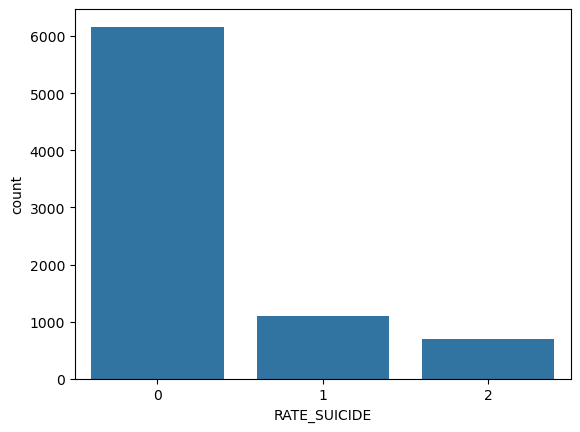

In [21]:
sns.countplot(data=df1, x='RATE_SUICIDE');

In [22]:
print(len(df1[df1['RATE_SUICIDE'] == 0]))
print(len(df1[df1['RATE_SUICIDE'] == 1]))
print(len(df1[df1['RATE_SUICIDE'] == 2]))

6164
1097
696


In [2]:
x = 6164 * 100 / 7957
y = 1097 * 100 / 7957
z = 696 * 100 / 7957

print(f'LOW {x:.2f}%\nMODERATE {y:.2f}%\nHIGH {z: .2f}%')

LOW 77.47%
MODERATE 13.79%
HIGH  8.75%


In [25]:
df1.to_csv('North_ML_ready.csv', index=False)